In [4]:
import time
from keras.models import load_model
from keras import optimizers

model_demo_type ='scratch'

startTime=time.time()

if model_demo_type is 'mobile': # dataset: internet
    saved_model = "./checkpoints/mob.015-0.023.hdf5"
    from keras.applications import mobilenet
    print("Loading model %s" % saved_model)
    model = load_model(saved_model, custom_objects={
                       'relu6': mobilenet.relu6,
                       'DepthwiseConv2D': mobilenet.DepthwiseConv2D})
    
elif model_demo_type is 'inception':
    from keras.applications import InceptionV3
    saved_model = "./checkpoints/inception.020-0.040.hdf5"
    print("Loading model %s" % saved_model)
    model = load_model(saved_model)
    
else: 
    saved_model = "./checkpoints/scratch.050-0.017.hdf5"
    print("Loading model %s" % saved_model)
    model = load_model(saved_model)

model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

endTime=time.time()
print( "Loading/compiling model time : %s [sec]" % (endTime-startTime))

Loading model ./checkpoints/scratch.050-0.017.hdf5
Loading/compiling model time : 1.4260144233703613 [sec]


In [2]:
image_width = 224
image_height = 224

test_dir = './data/cage_clamp/samples/'

In [8]:
# model evaluation
import os
# training data generator + image augmentation
from keras.preprocessing.image import ImageDataGenerator

# validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=50, # todo : memory pre loading
    class_mode='categorical')

result = model.evaluate_generator(test_generator, steps=7)

print (model.metrics_names)
print (result)

Found 14 images belonging to 4 classes.
['loss', 'acc']
[0.0013992556071441089, 1.0]


category: 221 | num of files: 4
..................................................................................................


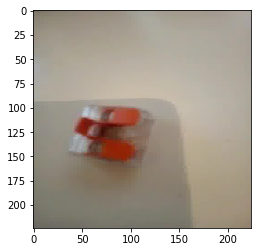

best match: 221 prediction time :    70 [ms]
221    : 99.96 percent
222    : 0.01 percent
luster : 0.00 percent
other  : 0.03 percent
---------------------------------------------------------------------------------------------


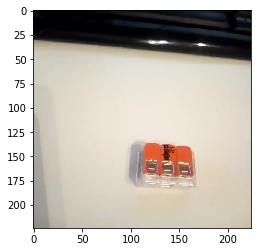

best match: 221 prediction time :    37 [ms]
221    : 99.97 percent
222    : 0.03 percent
luster : 0.00 percent
other  : 0.00 percent
---------------------------------------------------------------------------------------------


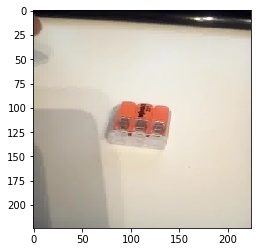

best match: 221 prediction time :    37 [ms]
221    : 99.97 percent
222    : 0.00 percent
luster : 0.00 percent
other  : 0.02 percent
---------------------------------------------------------------------------------------------


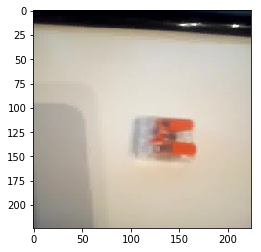

best match: 221 prediction time :    35 [ms]
221    : 98.60 percent
222    : 1.35 percent
luster : 0.00 percent
other  : 0.04 percent
---------------------------------------------------------------------------------------------
result for category: 221 | num of files: 4 |misclassified: 0 (0.00) 
_________________________________________________________________________________________________
category: 222 | num of files: 3
..................................................................................................


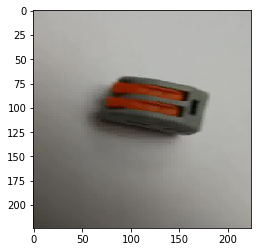

best match: 222 prediction time :    38 [ms]
221    : 0.00 percent
222    : 100.00 percent
luster : 0.00 percent
other  : 0.00 percent
---------------------------------------------------------------------------------------------


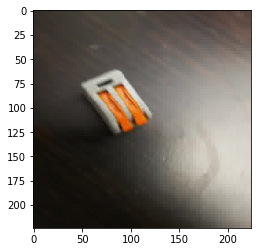

best match: 222 prediction time :    40 [ms]
221    : 0.00 percent
222    : 100.00 percent
luster : 0.00 percent
other  : 0.00 percent
---------------------------------------------------------------------------------------------


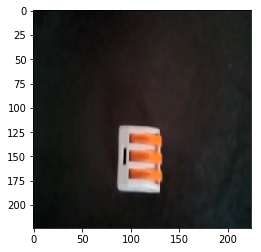

best match: 222 prediction time :    36 [ms]
221    : 0.00 percent
222    : 100.00 percent
luster : 0.00 percent
other  : 0.00 percent
---------------------------------------------------------------------------------------------
result for category: 222 | num of files: 3 |misclassified: 0 (0.00) 
_________________________________________________________________________________________________
category: luster | num of files: 4
..................................................................................................


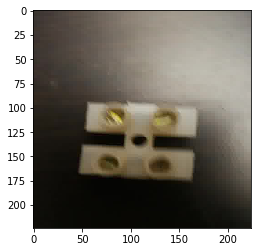

best match: luster prediction time :    35 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 100.00 percent
other  : 0.00 percent
---------------------------------------------------------------------------------------------


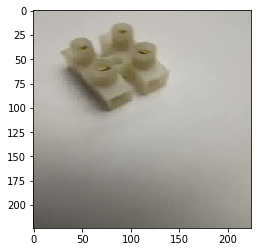

best match: luster prediction time :    40 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 99.98 percent
other  : 0.02 percent
---------------------------------------------------------------------------------------------


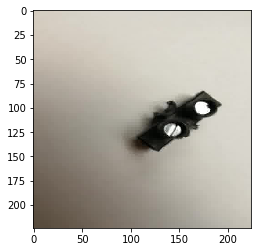

best match: luster prediction time :    37 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 99.98 percent
other  : 0.02 percent
---------------------------------------------------------------------------------------------


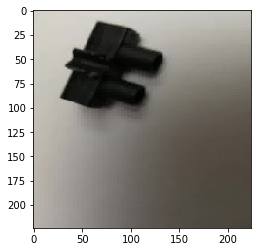

best match: luster prediction time :    36 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 99.99 percent
other  : 0.01 percent
---------------------------------------------------------------------------------------------
result for category: luster | num of files: 4 |misclassified: 0 (0.00) 
_________________________________________________________________________________________________
category: other | num of files: 3
..................................................................................................


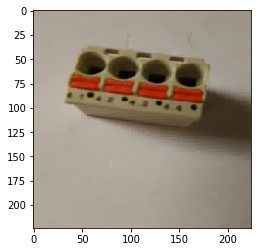

best match: other prediction time :    37 [ms]
221    : 0.00 percent
222    : 0.01 percent
luster : 0.00 percent
other  : 99.99 percent
---------------------------------------------------------------------------------------------


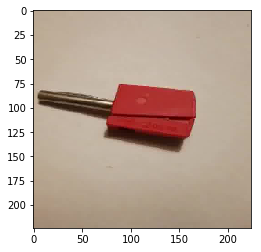

best match: other prediction time :    40 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 0.00 percent
other  : 100.00 percent
---------------------------------------------------------------------------------------------


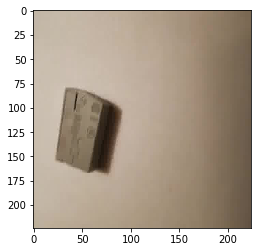

best match: other prediction time :    39 [ms]
221    : 0.00 percent
222    : 0.00 percent
luster : 0.40 percent
other  : 99.60 percent
---------------------------------------------------------------------------------------------
result for category: other | num of files: 3 |misclassified: 0 (0.00) 
_________________________________________________________________________________________________
overall file count:  14 | misclassified:  0 (0.00)


In [6]:
from keras.preprocessing.image import img_to_array, load_img
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

categories = {0:'221', 1:'222',2:'luster', 3:'other'};

certainty_threshold = 0.7

file_count = 0
category_miss_all = 0

def prepare_image(image_path):
    image = load_img(target_file, False, target_size=(image_width,image_height))
    image_tensor = img_to_array(image)
    image_tensor = np.expand_dims(image_tensor, axis=0)
    image_tensor /= 255.
    return image, image_tensor

def plot_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()
    
def print_prediction(prediction, index, time):
    print ('best match: %s prediction time :  %4.0f [ms]' % (categories[index], time*1000)) 
    #print ('raw prediction:', prediction, ' best match: ', categories[index])  
    for idx,val in enumerate( prediction[0] ):
        #print( '%s | %s : %4.2f percent' % (categories[idx].ljust(6), str(idx), val*100. ))
        print( '%s : %4.2f percent' % (categories[idx].ljust(6), val*100. ))
        
for key,value in categories.items():
    category_miss = 0
    category_image_dir = test_dir+value
    all_files = os.listdir(category_image_dir)
    category_file_count = len(all_files)
    print ('category:', value, '| num of files:' ,category_file_count)
    print ('..................................................................................................')
    if category_file_count == 0:
        continue
    for file in [f for f in all_files if f.endswith('.jpg')]:
        
        target_file = os.path.join(category_image_dir, file)
        image, image_tensor = prepare_image(target_file)
        plot_image(image)
    
        startTime=time.time()
        prediction = model.predict(image_tensor, verbose=0)
        index = np.argmax(prediction[0])
        endTime=time.time()

        print_prediction(prediction, index, (endTime-startTime))

        if int(key) is not int(index):
            print("\x1b[31m\"misclassification\"\x1b[0m")
            category_miss +=1
        elif prediction[0][index] < certainty_threshold:
            print("\x1b[33m\"warning uncertain\"\x1b[0m")
            
        print ('---------------------------------------------------------------------------------------------')

    file_count += category_file_count
    category_miss_all += category_miss
    
    result = category_miss * 100 / category_file_count
    print ('result for category:', value, '| num of files:' ,category_file_count, '|misclassified: %s (%4.2f) ' % (category_miss,result))
    print ('_________________________________________________________________________________________________')
    
result_all = category_miss_all * 100 / file_count
print ('overall file count: ', file_count, '| misclassified: ', category_miss_all, '(%4.2f)' %(result_all))